References: [Loan Approval Prediction](https://www.kaggle.com/ajaymanwani/loan-approval-prediction/notebook)

Step 1: Set state number 

In [158]:
# replace 888 with the last three digits of your student id
# and then press CTRL + Enter
my_state_number = 673

Step 2: read the data_set.csv

In [159]:
import pandas as pd
data = pd.read_csv("data_set.csv")

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Step 3: sample the data randomly the data and save the dataframe as myNewData 

In [160]:
myNewData = data.sample(frac =.90, replace = False, random_state = my_state_number) 

Start the Analytics using **myNewData** dataframe as the raw data
note: your *myNewData* dataframe may be different from other students' *myNewData* dataframe

# 0.0 Import dependencies

In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 1.0 Data Exploration

## 1.1 Dataset Details

In [162]:
# Start your codes
myNewData.shape

(553, 13)

The data has 553 rows (data) and 13 columns (features).

In [163]:
myNewData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 461 to 66
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            553 non-null    object 
 1   Gender             541 non-null    object 
 2   Married            551 non-null    object 
 3   Dependents         540 non-null    object 
 4   Education          553 non-null    object 
 5   Self_Employed      523 non-null    object 
 6   ApplicantIncome    553 non-null    int64  
 7   CoapplicantIncome  553 non-null    float64
 8   LoanAmount         535 non-null    float64
 9   Loan_Amount_Term   541 non-null    float64
 10  Credit_History     507 non-null    float64
 11  Property_Area      553 non-null    object 
 12  Loan_Status        553 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 60.5+ KB


All columns are of the `object` datatype except for `ApplicantIncome` that has `int64` type, `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term`, `Credit_History` of `float64` type. There are missing data where some columns do not have all 553 rows. The column names are inconsistent where some uses underscores and some using pure `CamelCase`.

Dropping `Loan_ID` before any data analysis is conducted as it does not offer any real meaning.

In [164]:
myNewData = myNewData.drop(columns='Loan_ID')

Renaming of data columns for a more consistent experience. `CamelCase` will be used.

In [165]:
myNewData = myNewData.rename(columns={'Self_Employed': 'SelfEmployed', 'Loan_Amount_Term': 'LoanAmountTerm', 'Credit_History': 'CreditHistory', 'Property_Area': 'PropertyArea', 'Loan_Status': 'LoanStatus'})

In [166]:
myNewData.head()

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
461,Male,Yes,3+,Graduate,No,7740,0.0,128.0,180.0,1.0,Urban,Y
597,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
455,Male,Yes,2,Graduate,No,3859,0.0,96.0,360.0,1.0,Semiurban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
196,Male,No,0,Graduate,No,8333,3750.0,187.0,360.0,1.0,Rural,Y


From the table above, it is known that numerical variables are `ApplicantIncome`, `CoapplicantIncome` and `LoanAmount`. The rest are categorical variables.

In [167]:
cat_data = (myNewData.drop(columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])).columns.values
num_data = (myNewData[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]).columns.values

In [168]:
myNewData.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory
count,553.000000,553.000000,535.000000,541.000000,507.000000
mean,5479.320072,1577.437468,147.319626,341.656192,0.852071
std,6357.052607,2916.184573,87.882458,65.922795,0.355380
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2833.000000,0.000000,100.000000,360.000000,1.000000
50%,3813.000000,1086.000000,128.000000,360.000000,1.000000
75%,5780.000000,2250.000000,167.500000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


The statistics above describe numerical data columns. It can be known that the data values of these columns are spread across a large range. For example, `ApplicantIncome` has a maximum value of 81000 whereas `CreditHistory` has a maximum value of only 1. These data values need to be scaled for better model accuracy.
<br />
<br />
Algorithms based on gradient descent such as linear regression and neural network perform better with scaled data because the data values will affect the step size of the gradient descent. The gradient descent will converge more quickly towards the minima when using data on a similar scale. Distance-based algorithms such as KNN and SVM are most affected by the range of data values as they calculate the distances between data points to find the similarity. The algorithms will stress more on features with data of a higher value, causing the model to be biased. Tree-based algorithms are quite insensitive to the data scales because the tree splits on a feature without taking other features into consideration.
<br />
<br />
There are two main scaling techinques, that are normalisation and standardisation. Normalisation will transform all values to fit in the range of 0 and 1, also known as min-max scaling. Standardisation turns the mean value into 0 and the other values centred around the mean value will have a unit standard deviation. There is no particular range to this scaling method.
<br />
<br />
Normalisation is used when the data distribution does not follow a Gaussian distribution, especially for KNN and neural networks, but it is very prone to outliers. Standardisation is helpful when the data follows a Gaussian distribution, but it is not necessarily so. Outliers in the data will not be affected by standardisation. The mean and standard deviation will be rescaled in such a way that they are very close to 0 and 1 respectively.

## 1.2 Data Exploration

Exploring the dataset's general distribution pattern.

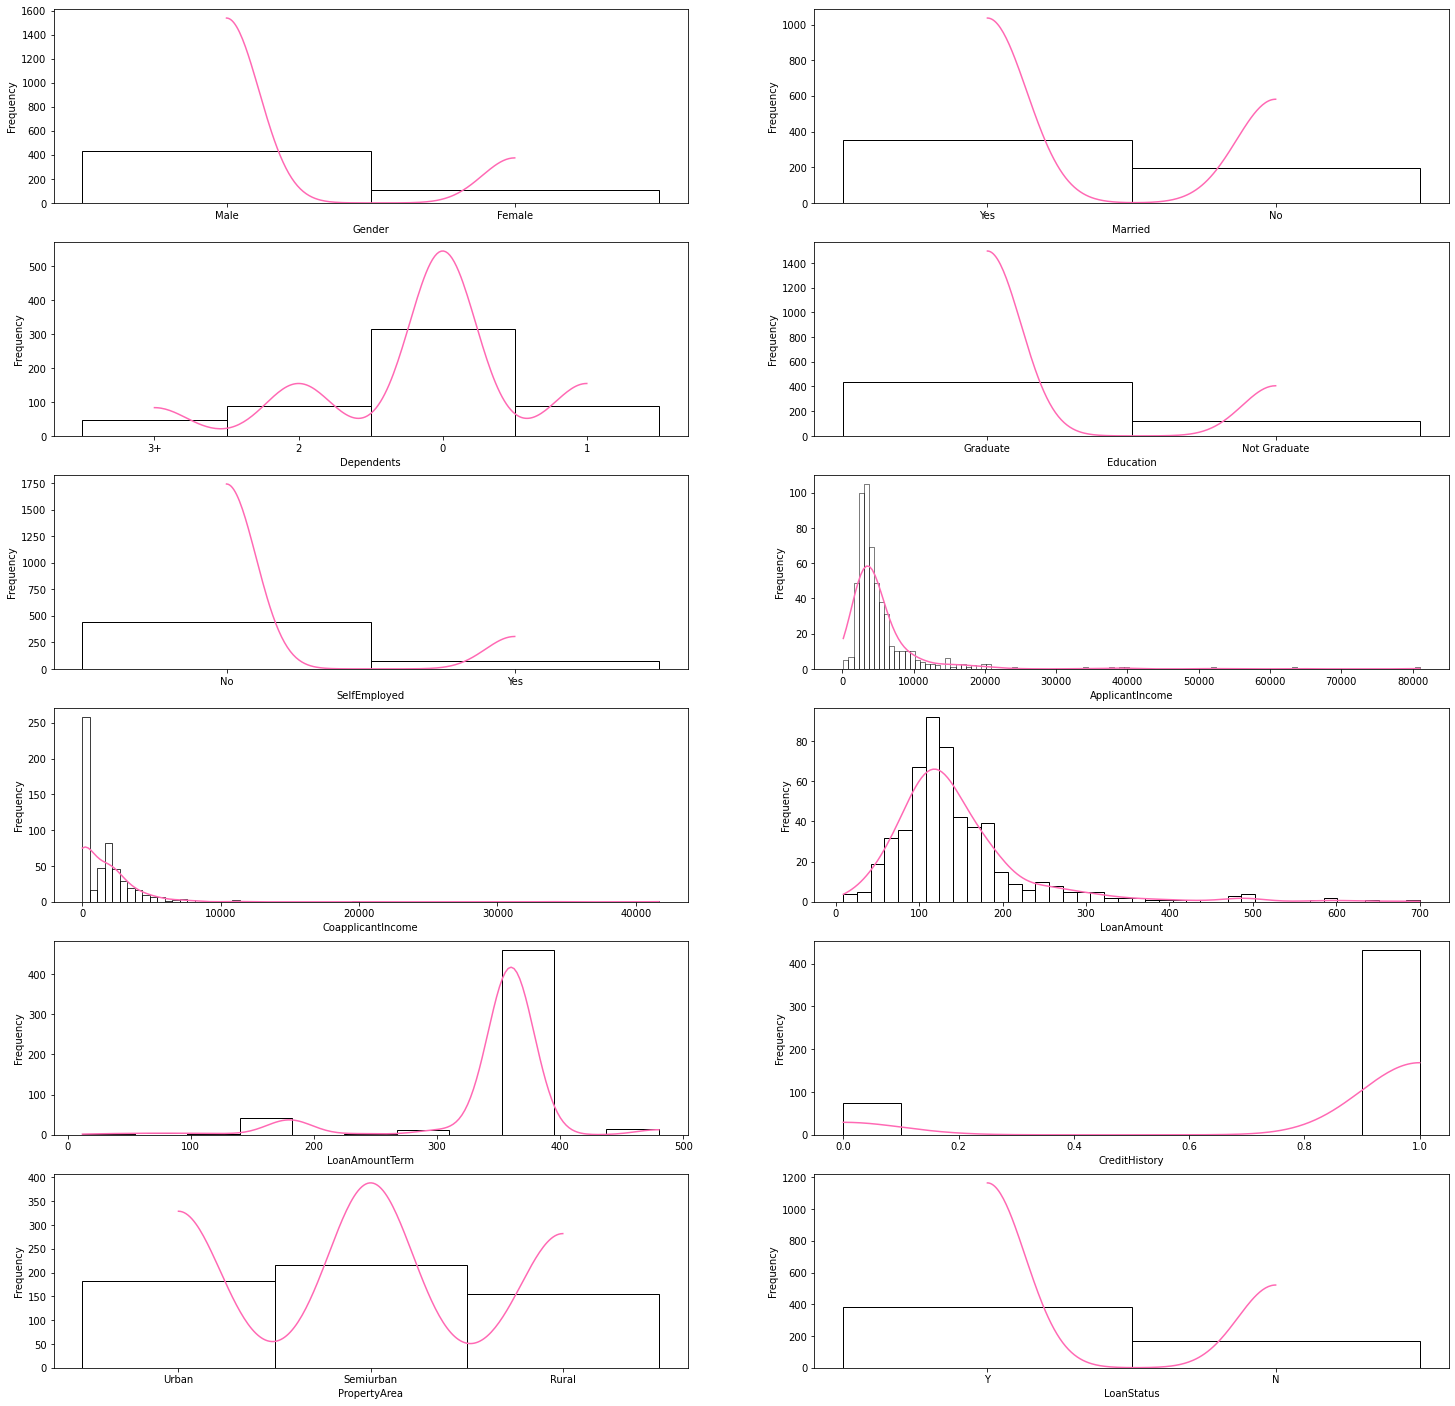

In [169]:
cols = list(myNewData.columns.values)

fig, ax = plt.subplots(6, 2, figsize=(25,25))
# fig.suptitle('Distribution of Dataset')

ax = ax.flatten() # ax is flattened from a 2D array to a 1D array, use ax.T.flatten() to transpose if needed

for i in range(len(cols)):
    sns.histplot(data=myNewData, ax=ax[i], x=cols[i], kde=True, color='hotpink', alpha=0)
    ax[i].set(xlabel=cols[i], ylabel='Frequency')

As shown from the graph above, there are five data distributions that do not follow a bell-shaped curve, which are all binary variables. All other data follows a normal distribution pattern. This analysis suggests that data standardisation instead of data normalisation might be applied onto the dataset.

Analysing categorical variables. Exploring the relationships between the features and the target variable (`LoanStatus`).

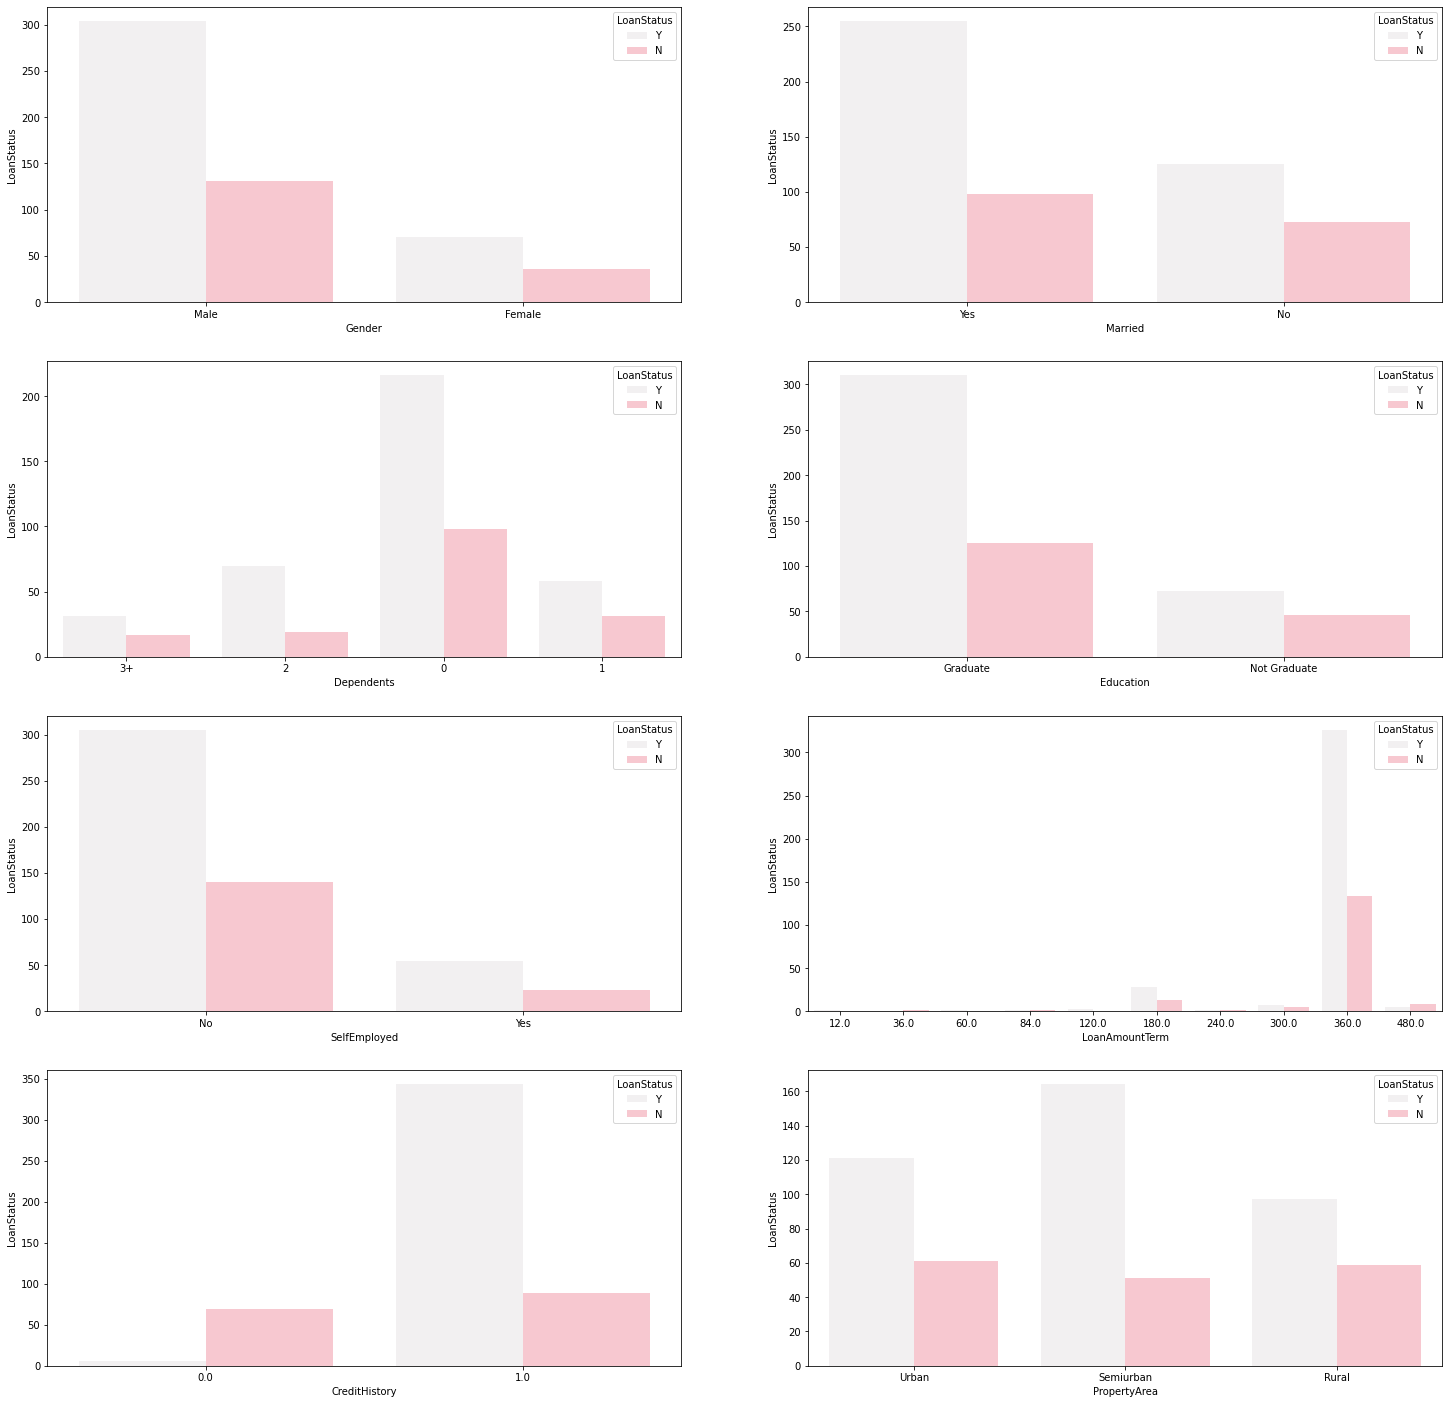

In [170]:
fig, ax = plt.subplots(4, 2, figsize=(25,25))

ax = ax.flatten()

for i, v in enumerate(cat_data):
    if(v == 'LoanStatus'):
        continue
    sns.countplot(data=myNewData, ax=ax[i], x=v, hue='LoanStatus', color='pink', alpha=1)
    ax[i].set(xlabel=v, ylabel='LoanStatus')

1. Around 3/5 applications have been approved.
2. There are approximately 3 times more male applicants than female.
3. Around 3/5 applicants are married. Married applicants are more likely to be granted loans.
4. Around 3/5 of the applicants have zero dependents. They are more likely to be granted loans.
5. Around 4/5 of the applicants are graduates, who are also more likely to be granted loans.
6. Less than 1/5 of the applicants are self-employed, who are not as likely to be granted loans as their counterparts.
7. Majority of the applicants have applied for a 30-year loan (360 months).
8. Applicants without credit history are unlikely to be granted loans.
9. There are more applicants from the semiurban property area and they are more likely to be granted loans.

Analysing numerical columns.

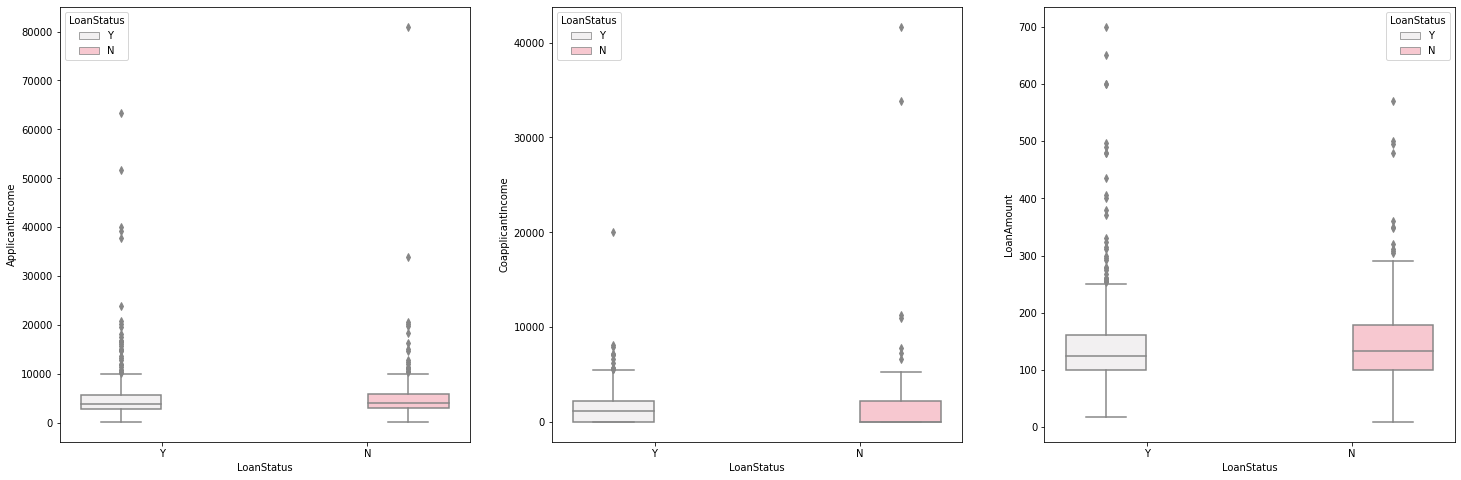

In [171]:
fig, ax = plt.subplots(1, 3, figsize=(25,8))

ax = ax.flatten()

for i, v in enumerate(num_data):
    if(v == 'LoanStatus'):
        continue
    sns.boxplot(data=myNewData, ax=ax[i], x='LoanStatus', y=v, hue='LoanStatus', color='pink')
    ax[i].set(xlabel='LoanStatus', ylabel=v)

It seems that these numerical variables do not have a significant relationship to `LoanStatus` as the boxes of `Y` and `N` do not have a significant difference between them.

# 2.0 Data Preprocessing

Encoding data values to be numerical for easier further processing.

In [172]:
df_encoded = myNewData.replace({'Male': 0, 'Female': 0, 'No': 0, 'Yes': 1, 'Not Graduate': 0, 'Graduate': 1, 'Rural': 0, 'Semiurban': 1, 'Urban': 2, 'N': 0, 'Y': 1, '0': 0, '1': 1, '2': 2, '3+': 3})

Heatmap

<AxesSubplot:>

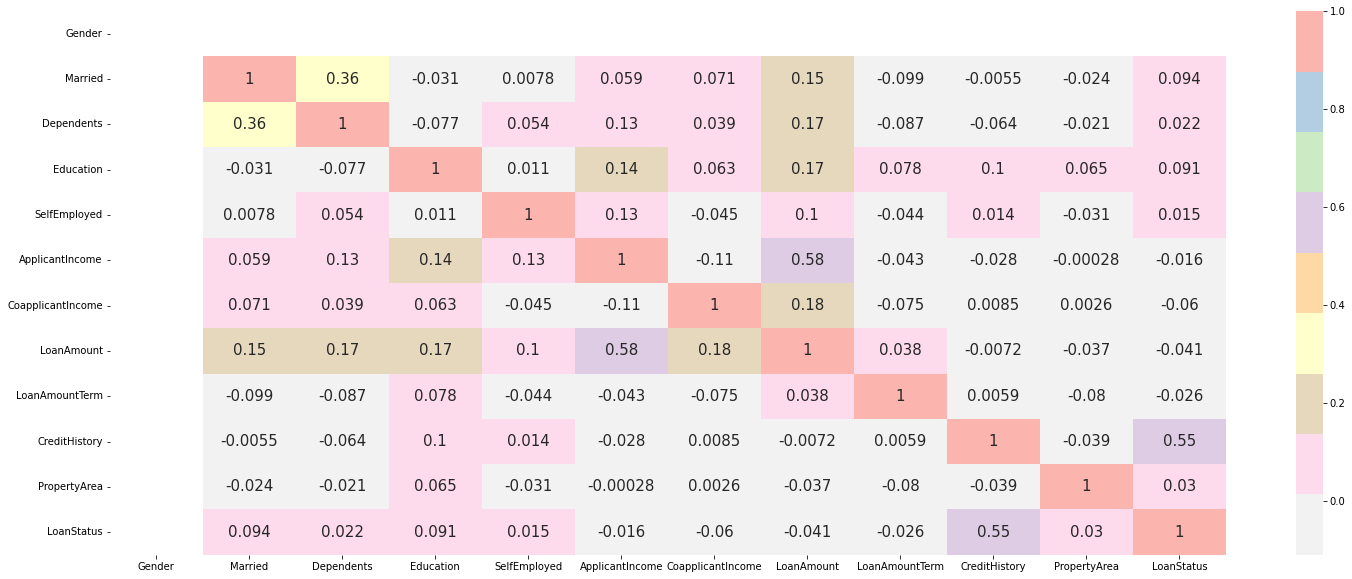

In [173]:
plt.figure(figsize=(25, 10))
sns.heatmap(df_encoded.corr(), cmap='Pastel1_r', annot=True, annot_kws={'size': 15})

Checking for null values.

In [176]:
myNewData.isnull().sum()

Gender               12
Married               2
Dependents           13
Education             0
SelfEmployed         30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
LoanAmountTerm       12
CreditHistory        46
PropertyArea          0
LoanStatus            0
dtype: int64

There are null values in the columns `Gender`, `Married`, `Dependents`, `SelfEmployed`, `LoanAmount`, `LoanAmountTerm`, `CreditHistory`.

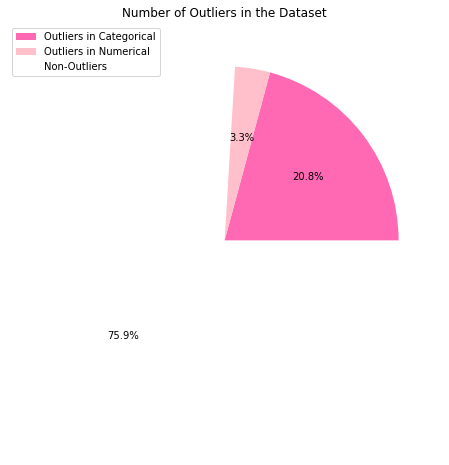

In [238]:
x = ['Outliers in Categorical', 'Outliers in Numerical', 'Non-Outliers']
y = [df_encoded[cat_data].isnull().values.sum(), df_encoded[num_data].isnull().values.sum(), df_encoded.shape[0] - df_encoded.isnull().values.sum()]

fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.pie(y, colors=['hotpink', 'pink', 'white'], explode=[0, 0, 0.2], autopct='%1.1f%%')
plt.legend(x)
plt.title("Number of Outliers in the Dataset")
plt.show()

In [246]:
print('Outliers in Categorical:', df_encoded[cat_data].isnull().values.sum())
print('Outliers in Numerical:', df_encoded[num_data].isnull().values.sum())
print('Total Outliers:', df_encoded.isnull().values.sum())

Outliers in Categorical: 115
Outliers in Numerical: 18
Total Outliers: 133


The total number of rows with missing data is 133, which is almost 1/5 of the dataset. Removing all these data might cause biasness in the model as the remaining dataset will be quite small. Therefore, the treatment approach will be taken.
<br />
<br />
There are a total of 115 rows of data which is 20.8% percent of the data that are categorical in nature. These rows are hard to replace.
<br />
Therefore, dropping data rows with missing values from these columns will be better than attempting to replace their values. 

In [ ]:
myNewData2 = myNewData.dropna(subset=binary)
myNewData2.shape

(498, 13)

# 2.0 Data Preprocessing

Dealing with missing values.

In [ ]:
myNewData3 = myNewData2.fillna(myNewData.mean())
myNewData3.isnull().any()

/tmp/ipykernel_2102/1952988659.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  myNewData3 = myNewData2.fillna(myNewData.mean())


Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

The numerical columns are filled with the mean of the columns from the original data before dropping any gender columns. Using mean is due to that it best represents the average. Calculating mean from the original data before dropping rows is because those dropped data are still valid and valuable data that contributes meaningfully to the mean.

In [ ]:
df = myNewData3.drop(columns='Loan_ID')
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
461,Male,Yes,3+,Graduate,No,7740,0.0,128.0,180.0,1.0,Urban,Y
455,Male,Yes,2,Graduate,No,3859,0.0,96.0,360.0,1.0,Semiurban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
196,Male,No,0,Graduate,No,8333,3750.0,187.0,360.0,1.0,Rural,Y
274,Male,Yes,2,Graduate,No,3900,0.0,90.0,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
227,Male,Yes,2,Graduate,No,6250,1695.0,210.0,360.0,1.0,Semiurban,Y
566,Male,No,0,Graduate,No,3333,0.0,70.0,360.0,1.0,Urban,Y
229,Male,No,0,Graduate,Yes,6400,0.0,200.0,360.0,1.0,Rural,Y
408,Male,Yes,1,Graduate,No,8300,0.0,152.0,300.0,0.0,Semiurban,N


In [ ]:
df = df.replace({'Male': 0, 'Female': 0, 'No': 0, 'Yes': 1, 'Not Graduate': 0, 'Graduate': 1, 'Rural': 0, 'Semiurban': 1, 'Urban': 2, 'N': 0, 'Y': 1, '0': 0, '1': 1, '2': 2, '3+': 3})

Replacing all string variables with integers for easier data processing.

In [ ]:
X_df = df.drop('Loan_Status', axis=1)
y_df = df['Loan_Status']

Split features and target label.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.3, random_state=0)

Split dataset into training and test sets using the 70:30 ratio for training:testing.

In [ ]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Normalising the data to improve model accuracy.

# Model Selection

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = 

SyntaxError: invalid syntax (2953769523.py, line 3)